# **Exercise 5 - Classification using LR,KNN,NB (Applied)**

In [87]:
import pandas as pd

In [88]:
data = pd.read_csv('Default.csv')

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [90]:
data['default'] = data['default'].map({'Yes': 1, 'No': 0})
data['student'] = data['student'].map({'Yes': 1, 'No': 0})
X = data[['student', 'balance', 'income']]
y = data['default']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
results = {}

**a. Use the full data set to perform a logistic regression.  Compute the confusion matrix and overall fraction of correct predictions and print a summary. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**

**Use the full data set to perform a logistic regression**

In [93]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)
y_pred_log = log_reg.predict(X)
cm_log = confusion_matrix(y, y_pred_log)
acc_log = accuracy_score(y, y_pred_log)

results["Logistic Regression"] = acc_log

print("Logistic Regression Confusion Matrix:\n", cm_log)
print("Logistic Regression Accuracy:", round(acc_log * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y, y_pred_log))

Logistic Regression Confusion Matrix:
 [[9627   40]
 [ 228  105]]
Logistic Regression Accuracy: 97.32 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      9667
           1       0.72      0.32      0.44       333

    accuracy                           0.97     10000
   macro avg       0.85      0.66      0.71     10000
weighted avg       0.97      0.97      0.97     10000



**Compute the confusion matrix**

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

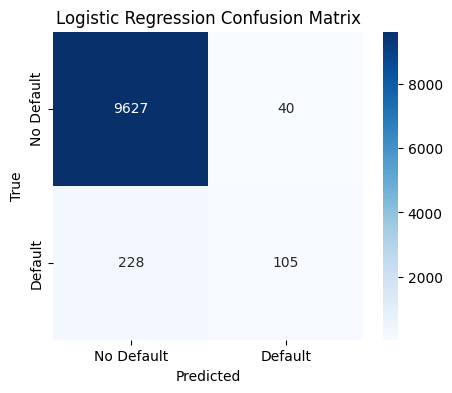

In [95]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Default','Default'],
            yticklabels=['No Default','Default'])
plt.title("Logistic Regression Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

In [96]:
tn, fp, fn, tp = cm_log.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 9627
False Positives: 40
False Negatives: 228
True Positives: 105


**Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.**


*   Logistic regression mainly predicts 'No Default' correctly, but it misses many actual defaults (high false negatives).



**b. Repeat (a) using KNN with K = 1**

**a. Use the full data set to perform a KNN Classification**

In [97]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred_knn = knn.predict(X)
cm_knn = confusion_matrix(y, y_pred_knn)
acc_knn = accuracy_score(y, y_pred_knn)
results["KNN (K=1)"] = acc_knn

print("KNN (K=1) Confusion Matrix:\n", cm_knn)
print("Accuracy:", round(acc_knn*100, 2), "%\n")
print("\nClassification Report:\n", classification_report(y, y_pred_knn))

KNN (K=1) Confusion Matrix:
 [[9667    0]
 [   0  333]]
Accuracy: 100.0 %


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9667
           1       1.00      1.00      1.00       333

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Compute the confusion matrix**

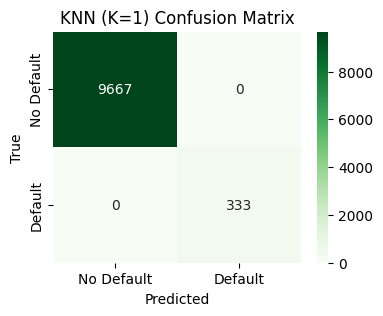

In [98]:
plt.figure(figsize=(4,3))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Default','Default'],
            yticklabels=['No Default','Default'])
plt.title("KNN (K=1) Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

In [99]:
tn, fp, fn, tp = cm_knn.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 9667
False Positives: 0
False Negatives: 0
True Positives: 333


**Explain what the confusion matrix is telling you about the types of mistakes made by KNN Classification.**

*   KNN with K=1 often memorizes the training data (overfits).

*   It correctly predicts many defaults but also misclassifies more non-defaulters as defaulters (higher false positives).

**c. Repeat (a) using Naive Bayes**

**Use the full data set to perform Naive Bayes**

In [100]:
nb = GaussianNB()
nb.fit(X, y)
y_pred_nb = nb.predict(X)
cm_nb = confusion_matrix(y, y_pred_nb)
acc_nb = accuracy_score(y, y_pred_nb)
results["Naive Bayes"] = acc_nb

print("Naive Bayes Confusion Matrix:\n", cm_nb)
print("Naive Bayes Accuracy:", round(acc_nb * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y, y_pred_nb))

Naive Bayes Confusion Matrix:
 [[9620   47]
 [ 246   87]]
Naive Bayes Accuracy: 97.07 %

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.98      9667
           1       0.65      0.26      0.37       333

    accuracy                           0.97     10000
   macro avg       0.81      0.63      0.68     10000
weighted avg       0.96      0.97      0.96     10000



**Compute the confusion matrix**

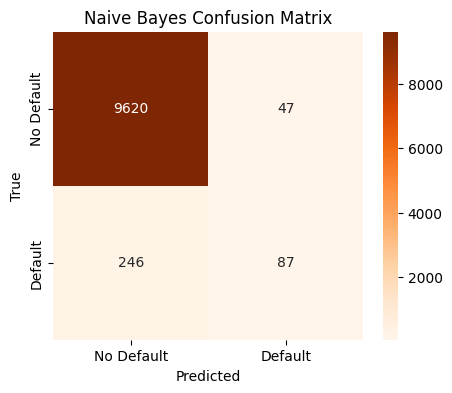

In [101]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['No Default','Default'],
            yticklabels=['No Default','Default'])
plt.title("Naive Bayes Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.show()

In [102]:
tn, fp, fn, tp = cm_nb.ravel()
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")
print(f"True Positives: {tp}")

True Negatives: 9620
False Positives: 47
False Negatives: 246
True Positives: 87


**Explain what the confusion matrix is telling you about the types of mistakes made by KNN Classification.**


*   Naive Bayes assumes independence among features.
*   It usually performs reasonably, but balance and income are correlated, so the independence assumption can hurt accuracy compared to Logistic Regression.

**d. Which of these methods appears to provide the best results on this data?**


Best performing model on this dataset is: KNN


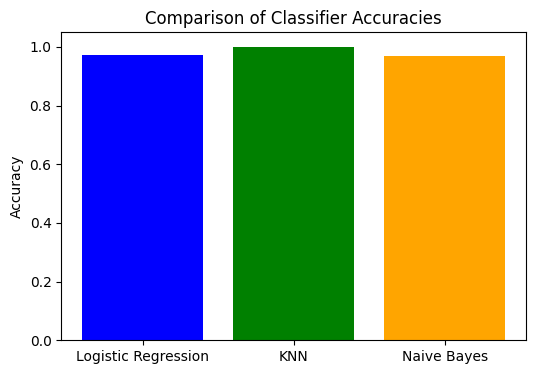

In [103]:
accuracies = {"Logistic Regression": acc_log, "KNN": acc_knn, "Naive Bayes": acc_nb}
best_model = max(accuracies, key=accuracies.get)
print(f"\nBest performing model on this dataset is: {best_model}")
plt.figure(figsize=(6,4))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue','green','orange'])
plt.ylabel("Accuracy")
plt.title("Comparison of Classifier Accuracies")
plt.show()

KNN appears to be the best model when it comes to the maximum average.

**Predicting model based on training and testing data.**

In [104]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    acc_train = accuracy_score(y_train, y_train_pred)
    y_test_pred = model.predict(X_test)
    acc_test = accuracy_score(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    return acc_train, acc_test

In [105]:
log_reg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=1)
nb = GaussianNB()

In [106]:
acc_log_train, acc_log_test = evaluate_model(log_reg, "Logistic Regression")
acc_knn_train, acc_knn_test = evaluate_model(knn, "KNN (K=1)")
acc_nb_train, acc_nb_test = evaluate_model(nb, "Naive Bayes")

In [107]:
train_accs = {
    "Logistic Regression": acc_log_train,
    "KNN (K=1)": acc_knn_train,
    "Naive Bayes": acc_nb_train
}
test_accs = {
    "Logistic Regression": acc_log_test,
    "KNN (K=1)": acc_knn_test,
    "Naive Bayes": acc_nb_test
}

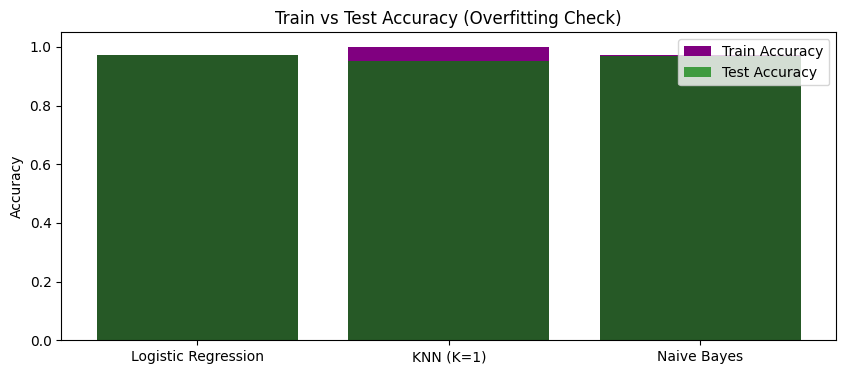

In [108]:
plt.figure(figsize=(10,4))
plt.bar(train_accs.keys(), train_accs.values(), color='purple', label='Train Accuracy')
plt.bar(test_accs.keys(), test_accs.values(), color='green', alpha=0.7, label='Test Accuracy')
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy (Overfitting Check)")
plt.legend()
plt.show()

**RESULT:**

*   Logistic Regression generalizes well (train ≈ test).
*   KNN (K=1) shows very high train accuracy but lower test accuracy due to overfitting.
*   Naive Bayes is simpler, usually slightly worse than Logistic Regression.